<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Words don't come easy, or do they?
## A first excursion to natural language processing

[Project Gutenberg](https://www.gutenberg.org/)

In [ ]:
!pip install gutenbergpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29268 sha256=c15e97528905c60e8c6bf9cbd38fc05e474cd078d7b29ee1b4155d77a2cd4230
  Stored in directory: /root/.cache/pip/wheels/53/57/bd/850ce7bfbcd434ed097d0435a1dd738e463e634e2f1b1c00d3
Successfully built httpsproxy-urllib2


[Jane Austen's Price and Prejudice](https://www.gutenberg.org/ebooks/1342) has ID number 1342 with the catalog.

In [ ]:
target = 1342 # 
import gutenbergpy.textget
raw  = gutenbergpy.textget.get_text_by_id(target) # access the book content
content = gutenbergpy.textget.strip_headers(raw) # remove header metadata
text = content.decode("utf-8") # encoding of the content
print(text[:1000]) # the first thousand characters






                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




                                PRIDE.
                                  and
                               PREJUDICE

                                  by
                             Jane Austen,

                           with a Preface by
                           George Saintsbury
                                  and
                           Illustrations by
                             Hugh Thomson

                         [Illustration: 1894]

                       Ruskin       156. Charing
                       House.        Cross Road.

In [ ]:
marker = 'Chapter I.]'
start = text.index(marker)
book = text[start:]
print(book[:1000])

Chapter I.]


It is a truth universally acknowledged, that a single man in possession
of a good fortune must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered as the rightful
property of some one or other of their daughters.

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that
Netherfield Park is let at last?”

Mr. Bennet replied that he had not.

“But it is,” returned she; “for Mrs. Long has just been here, and she
told me all about it.”

Mr. Bennet made no answer.

“Do not you want to know who has taken it?” cried his wife, impatiently.

“_You_ want to tell me, and I have no objection to hearing it.”

[Illustration:

“He came down to see the place”

[_Copyright 1894 by George Allen._]]

This was invitation enough.

“Why, my dear, you must know, Mrs. Long says that Netherfield is taken
by a young ma

In [ ]:
from string import punctuation
removed = text.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
print(removed[:1000]) 






                             Illustration 

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                    

                             Illustration 

                Reading Jane’s Letters         Chap 34  
                                    




                                PRIDE 
                                  and
                               PREJUDICE

                                  by
                             Jane Austen 

                           with a Preface by
                           George Saintsbury
                                  and
                           Illustrations by
                             Hugh Thomson

                          Illustration  1894 

                       Ruskin       156  Charing
                       House         Cross Road 

Better. Note that the apostrophe is still there. We need to clean out non-ASCII punctuation as well.

In [ ]:
import re # regular expressions
from string import printable 
print('Allow these:', printable)
forbid = f'[^{re.escape(printable)}]' # everything else must go

Allow these: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [ ]:
ok = re.sub(forbid, ' ', removed)
print(ok[:500])






                             Illustration 

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                    

                             Illustration 

                Reading Jane s Letters         Chap 34  
                                    




                                PRIDE 
                   


Now, there is a lot of whitespace there. Let's remove repeated spaces.

In [ ]:
clean = re.compile(r'\s+') 
cleaner = clean.sub(' ', ok) # remove repeated spaces
print(cleaner[:100])

 Illustration GEORGE ALLEN PUBLISHER 156 CHARING CROSS ROAD LONDON RUSKIN HOUSE Illustration Reading


In [ ]:
words = cleaner.split() # break it into individual words
len(words) # how many words are there in the book

128704

Let's get rid of all words that are in ALLCAPS. Nobody likes that and they seen to be headers anyhow.

In [ ]:
print('HELLO'.isupper())
print('Hello'.isupper())

True
False


In [ ]:
def keep(word):
  return not word.isupper()

In [ ]:
good = list(filter(keep, words))
len(good)

126301

In [ ]:
good[:30]

['Illustration',
 '156',
 'Illustration',
 'Reading',
 'Jane',
 's',
 'Letters',
 'Chap',
 '34',
 'and',
 'by',
 'Jane',
 'Austen',
 'with',
 'a',
 'Preface',
 'by',
 'George',
 'Saintsbury',
 'and',
 'Illustrations',
 'by',
 'Hugh',
 'Thomson',
 'Illustration',
 '1894',
 'Ruskin',
 '156',
 'Charing',
 'House']

More obvious things to get rid of: words that are just *digits* and *stop words* like articles and prepositions.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def keepAgain(w):
  return not (w.lower() in sw) and not (w.isdigit())

better = list(filter(keepAgain, good))
len(better)

57869

In [ ]:
better[:30]

['Illustration',
 'Illustration',
 'Reading',
 'Jane',
 'Letters',
 'Chap',
 'Jane',
 'Austen',
 'Preface',
 'George',
 'Saintsbury',
 'Illustrations',
 'Hugh',
 'Thomson',
 'Illustration',
 'Ruskin',
 'Charing',
 'House',
 'Cross',
 'Road',
 'London',
 'George',
 'Allen',
 'Illustration',
 'Comyns',
 'Carr',
 'acknowledgment',
 'owe',
 'friendship',
 'advice']

Note that the singular and plural of the same word appear. We can make them match so that we could then better count how many times each word appears. 

Let's try a simple rule: if a word is present both with and without an 's' suffix, remove the suffix.

In [ ]:
test = 'animals'
print(test[-1])
print(test[-1] == 's')
print(test[:-1])

s
True
animal


In [ ]:
distinct = set(better)

def singularize(word):
  if word[-1] == 's': # ends in 's'
    cropped = word[:-1]
    if cropped in distinct:
      return cropped
  return word

In [ ]:
simple = [ singularize(w) for w in better ]
simple[:30]

['Illustration',
 'Illustration',
 'Reading',
 'Jane',
 'Letters',
 'Chap',
 'Jane',
 'Austen',
 'Preface',
 'George',
 'Saintsbury',
 'Illustration',
 'Hugh',
 'Thomson',
 'Illustration',
 'Ruskin',
 'Charing',
 'House',
 'Cross',
 'Road',
 'London',
 'George',
 'Allen',
 'Illustration',
 'Comyns',
 'Carr',
 'acknowledgment',
 'owe',
 'friendship',
 'advice']

In [ ]:
distinct = set(simple)
wordfreq = { w : better.count(w) for w in distinct } # count occurrences (this takes a LONG TIME)
len(wordfreq) # how many DISTINCT words are there

6277

Let's look at the most frequent and the longest word to get a hang of what this contains.

In [ ]:
import operator
print(max(wordfreq.items(), key = operator.itemgetter(1))[0]) # the most frequent word
print(max(wordfreq.keys(), key = len)) # the longest word

Mr
disinterestedness


In [ ]:
desc = sorted(wordfreq.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
count = 25
for (word, freq) in desc:
  print(freq, word)
  count -= 1
  if count == 0:
    break

808 Mr
645 Elizabeth
521 could
482 would
431 Darcy
406 said
338 Bennet
332 much
314 must
313 Miss
309 Bingley
302 Jane
281 one
244 know
224 though
224 never
221 think
217 sister
215 soon
206 might
201 time
200 Wickham
198 may
195 good
194 well


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


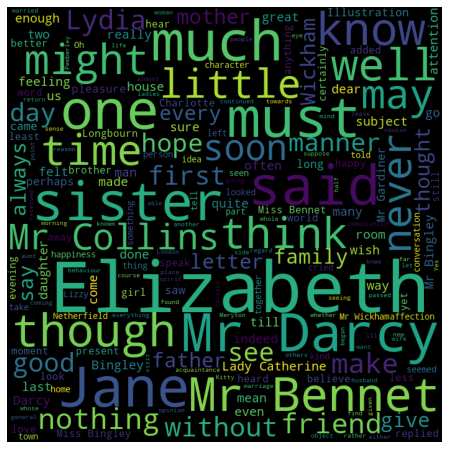

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

from wordcloud import WordCloud
t = ' '.join(simple)
cloud = WordCloud(width = 700, height = 700).generate(t)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
import networkx as nx

middle = len(simple) // 2
length = 60

graph = nx.DiGraph()
sequence = simple.copy()[ (middle - length) : (middle + length) ] # just a fragment 

currentWord = sequence.pop(0)
while len(sequence) > 0:
  followingWord = sequence.pop(0)
  if graph.has_edge(currentWord, followingWord):
    graph[currentWord][followingWord]['weight'] += 1
  else:
    graph.add_edge(currentWord, followingWord, weight = 1)
  currentWord = followingWord

In [ ]:
print(graph)

DiGraph with 108 nodes and 117 edges


In [ ]:
pos = nx.spring_layout(graph) # calculate positions (this takes a long time)

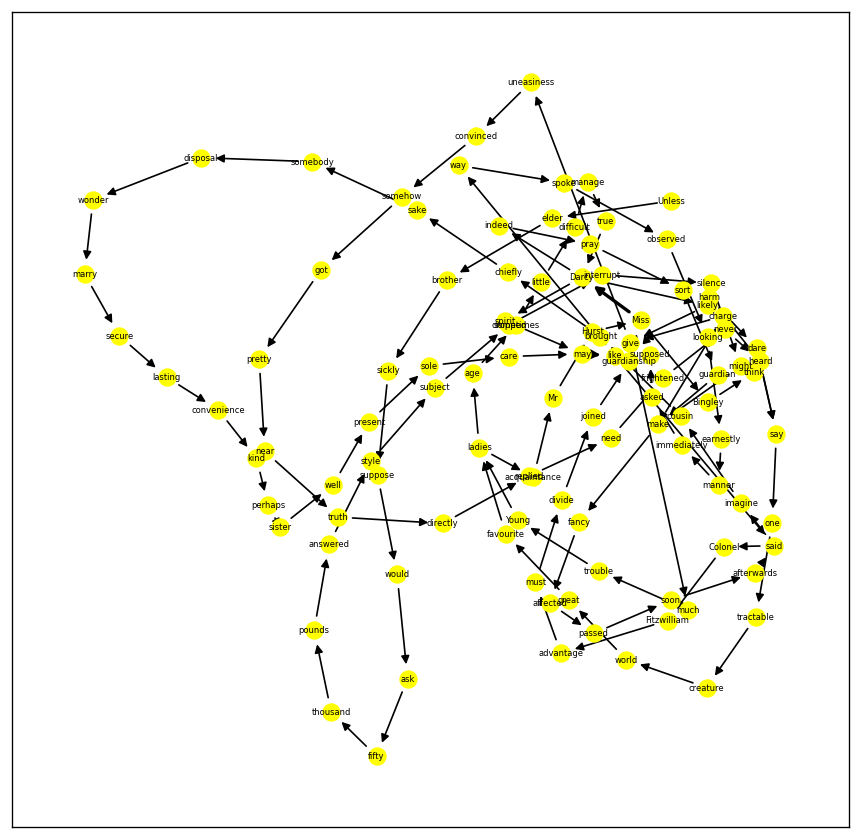

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (9, 9), dpi =  120)
V = nx.draw_networkx_nodes(graph, pos, node_size = 100, node_color = 'yellow')

w = [ graph[u][v]['weight'] for u, v in graph.edges ]
E = nx.draw_networkx_edges(graph, pos, width = w)
vl = nx.draw_networkx_labels(graph, pos, font_size = 5)